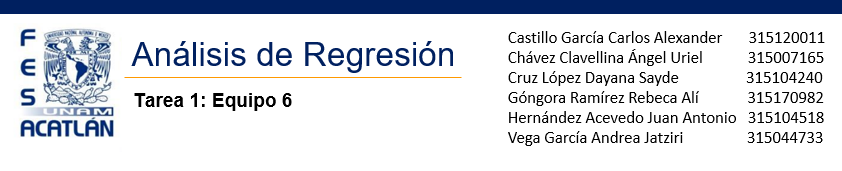





# **Descripción de la base de datos**



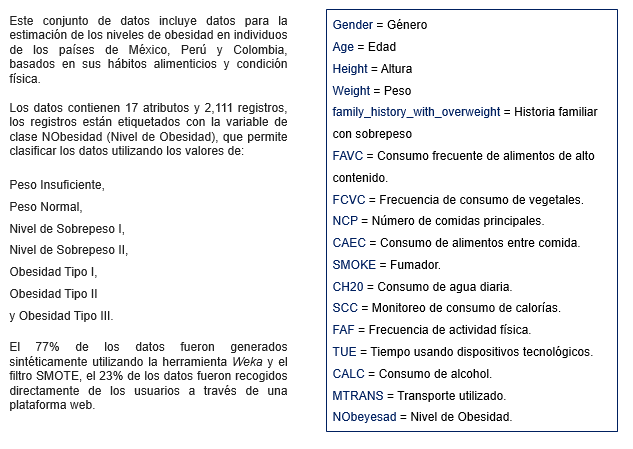

# **Variable objetivo**

 Nuestra Varibale objetivo será "Weight" y lo que deseamos observar es si podemos describirla en función de 

1.   "Height" (Altura) y
2.   "family_history_with_overweight" (Antecedentes familiares con sobrepeso)

  

# **Análisis exploratorio**

In [1]:
pip install faraway

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Importamos librerias que necesitaremos 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import scipy as sp
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.tsa.api as smt
import faraway.utils
import numpy.random
from numpy.random import seed
from numpy.random import randn
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from scipy.stats.stats import pearsonr
from scipy import stats


In [3]:
#Importando el archivo
df = pd.read_csv("https://raw.githubusercontent.com/RiemanNClav/Obesidad-/master/Obesidad.csv")

In [4]:
df #imprimimos nuestra data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Nobesity
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [5]:
df.info() #Imprimimos toda la informacion de nuestra data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [6]:
df.shape #Sacamos con cuantas categorias y registros contamos 

(2111, 17)

Contamos con 2111 registros y 17 Variables

In [7]:
#Buscamos cuantos valores nulos tenemos dentro de nuestra data
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
Nobesity                          0
dtype: int64

Text(0.5, 1.0, 'Valores Nulos')

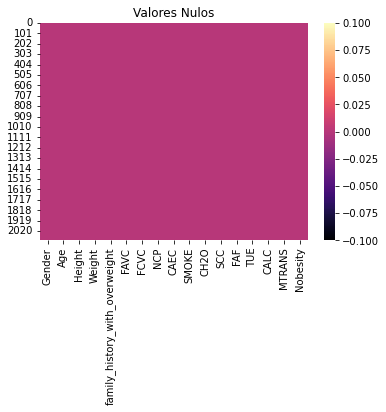

In [8]:
#Generamos un gráfico para reafirmar que no hay valores nulos
sns.heatmap(df.isnull(),cmap='magma')
plt.title("Valores Nulos",)

In [9]:
#realizamos un analisis matemático básico de nuestra información
numericas=df.describe().round()

In [10]:
numericas #imprimimos resultados

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.0,2111.0,2111.0,2111.0,2111.0,2111.0,2111.0,2111.0
mean,24.0,2.0,87.0,2.0,3.0,2.0,1.0,1.0
std,6.0,0.0,26.0,1.0,1.0,1.0,1.0,1.0
min,14.0,1.0,39.0,1.0,1.0,1.0,0.0,0.0
25%,20.0,2.0,65.0,2.0,3.0,2.0,0.0,0.0
50%,23.0,2.0,83.0,2.0,3.0,2.0,1.0,1.0
75%,26.0,2.0,107.0,3.0,3.0,2.0,2.0,1.0
max,61.0,2.0,173.0,3.0,4.0,3.0,3.0,2.0


Observaciones:
* La media de las personas es de 24 años, la persona con la mayor edad es de 61 y quien tiene la edad mas pequeña es de 14. (Age)
* El promedio del peso registrado es de 86kg y el peso máximo es de 173 kg. (Weight)
* La altura máxima es de 1.98 mts y la mínima es de 1.45 mts, el promedio de todo es de 1.70 mts  (Height)
* La cantidad máxima de comidas que habitualmente alguien consume es de 4 comidas diarias, la mínima de 1, el promedio es de aproximandamente 2. (NCP)
* El consumo máximo de agua diaria es de 3 litros y el mínimo es de 1 litro, considerando que la media es de 2 litros coincidiendo con la media que es de 2 litros.  (CH20) 
* El tiempo máximo que pasa una persona en el celular es de 2 horas. (TUE)


In [11]:
categoricas = [x for x in df.columns if x not in numericas.columns]

In [12]:
binarias = []
for x in categoricas:
    n = len(df[x].unique())
    if n == 2:
        binarias.append(x)
        print(df[x].unique())

['Female' 'Male']
['yes' 'no']
['no' 'yes']
['no' 'yes']
['no' 'yes']


In [13]:
#Identificamos las variables para hacerlas binarias
binarias

['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']

In [14]:
for x in binarias:
    if set(df[x].unique()) <= {'Female','Male'}:
        df[x] = df[x].apply(lambda x: 1 if x == 'Male' else 0)
    else:
        df[x] = df[x].apply(lambda x: 1 if x == 'yes' else 0) 

In [15]:
#Primeros cinco registros
df.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Nobesity
0,0,21.0,1.62,64.0,1,0,2.0,3.0,Sometimes,0,2.0,0,0.0,1.0,no,Public_Transportation,Normal_Weight
1,0,21.0,1.52,56.0,1,0,3.0,3.0,Sometimes,1,3.0,1,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,1,23.0,1.80,77.0,1,0,2.0,3.0,Sometimes,0,2.0,0,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,1,27.0,1.80,87.0,0,0,3.0,3.0,Sometimes,0,2.0,0,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,1,22.0,1.78,89.8,0,0,2.0,1.0,Sometimes,0,2.0,0,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Text(0.5, 1.0, 'Set')

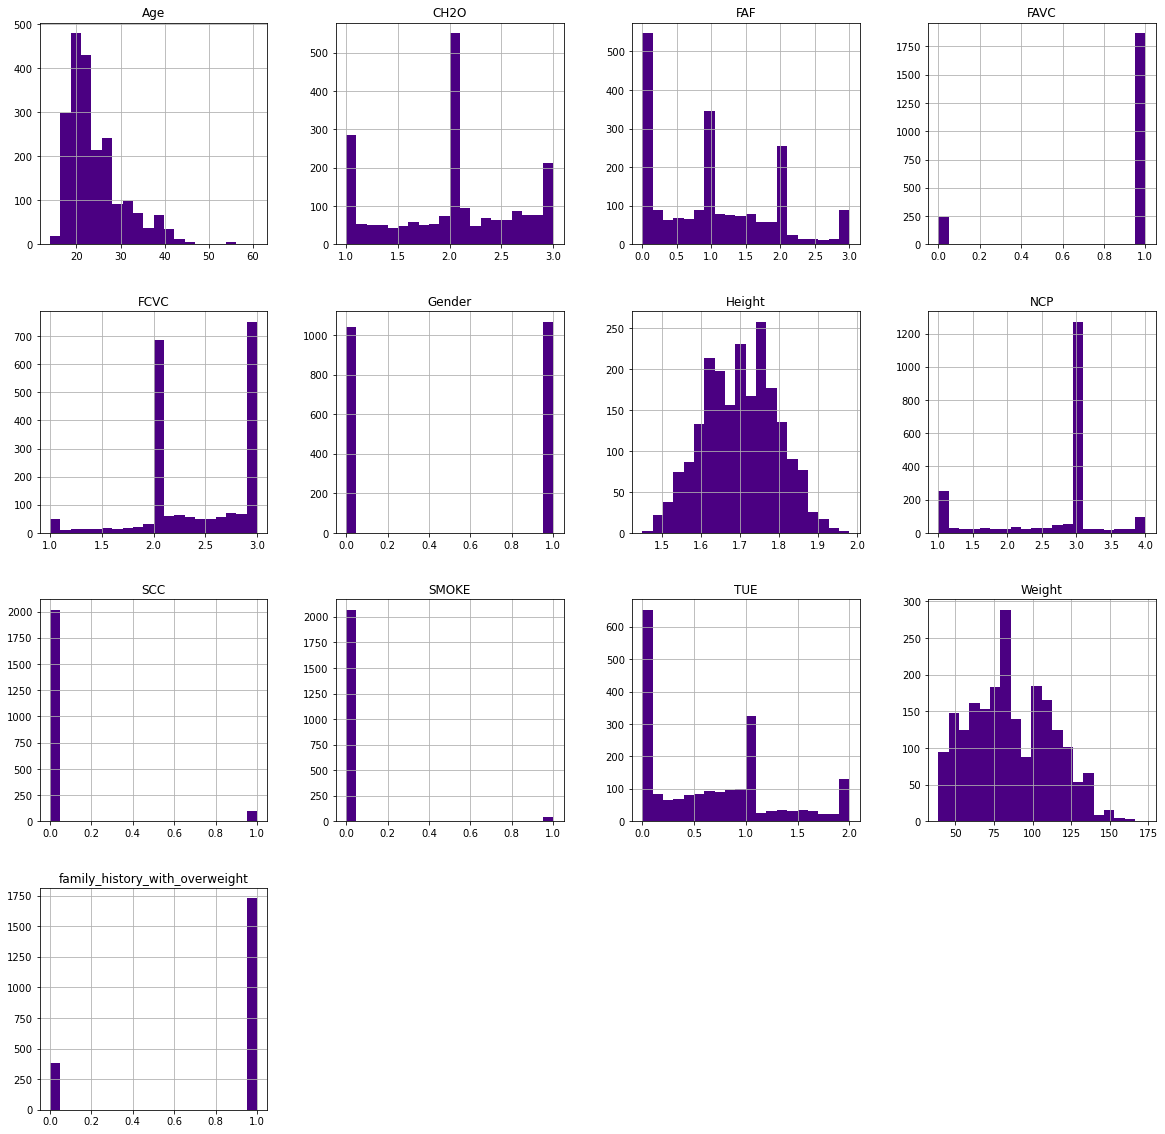

In [16]:
#Representaremos un histograma con las caracteristicas de nuestro dataframe, como se distribuyen 
#cada una de las variables del dataframe (numericas)

df.hist(grid=bool ,bins = 20, figsize=(20,20), color = 'indigo')
plt.title("Set")

* Aproximadamente tenemos 1750 personas que tienen historial de familiares con sobrepeso.
* La mayoría de la población estan entre 75 y 100 kg de peso.
* Mas de 600 peronas tienen un tiempo muy minimo de uso en su celular. 
* Menos de 10 personas tienen registro de ser fumadores. 
* Un poco mas de 1200 personas tienen un consumo habitual de 3 comidas por dia. 
* La mayoria de la población estan entre 1.7 y 1.8 mts de altura
* Mas de 2000 personas son mujeres. 
* La mayoria de la población tienen un consumo de 2 litros diarios.
* La mayoria de la población estan entrw 15 y 25 años.


In [17]:
categoricas = [x for x in categoricas if x not in binarias]

In [18]:
categoricas

['CAEC', 'CALC', 'MTRANS', 'Nobesity']

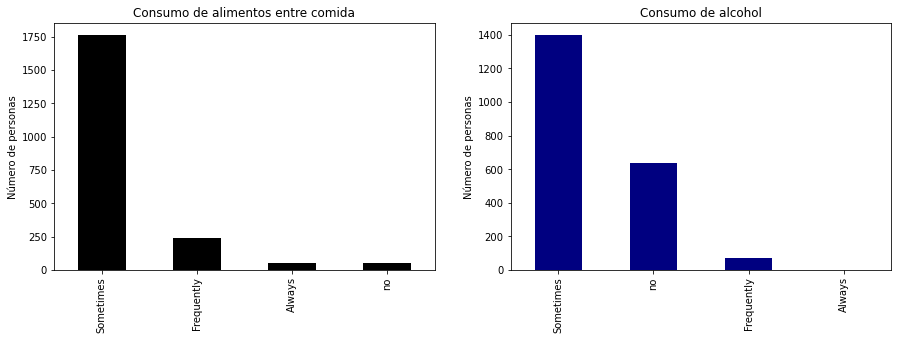

In [19]:
plt.figure(figsize = (15,10))
# plot 1 (primera fila primera columna)
plt.subplot(2, 2, 1)
fig = df['CAEC'].value_counts().plot.bar(color = '0')
fig.set_title('Consumo de alimentos entre comida')
fig.set_ylabel('Número de personas')

# plot 2 (primera fila segunda columna)
plt.subplot(2, 2, 2)
fig = df['CALC'].value_counts().plot.bar(color = 'navy')
fig.set_title('Consumo de alcohol')
fig.set_ylabel('Número de personas')


plt.show()

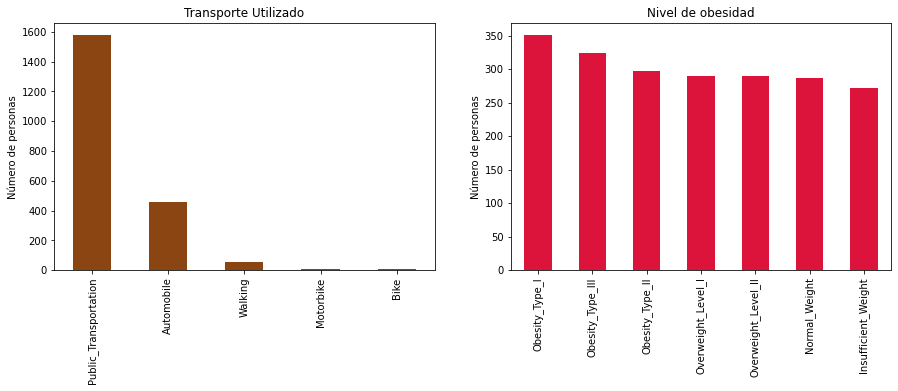

In [20]:
plt.figure(figsize = (15,10))
# plot 3 (segunda fila primera columna)
plt.subplot(2, 2, 3)
fig = df['MTRANS'].value_counts().plot.bar(color = 'saddlebrown')
fig.set_title('Transporte Utilizado')
fig.set_ylabel('Número de personas')

# plot 4 (segunda fila segunda columna)
plt.subplot(2, 2, 4)
fig = df['Nobesity'].value_counts().plot.bar(color = 'crimson')
fig.set_title('Nivel de obesidad')
fig.set_ylabel('Número de personas')
plt.show()

* En la población la condición que más sobresale es el tener Obesidad de tipo 1, aunque casi todas las demás estan muy homogéneas. 
* Mas de 1400 personas usan tranporte público. 
* La mayoria de la poblacion aveces consumen alcohol, ocasionalmente. 
* La mayoria de las personas consumen algun tipo de alimentos entre comida. 

<Figure size 2880x2880 with 0 Axes>

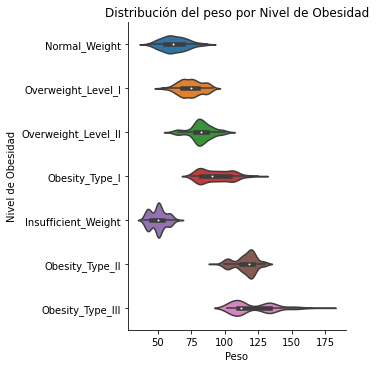

In [21]:
#para visualizar en base al nivel de obesidad
plt.figure(figsize = (40,40))
ax = sns.catplot(data = df, kind = 'violin', y = 'Nobesity', x = 'Weight')
ax.set(xlabel = 'Peso', ylabel = 'Nivel de Obesidad', title = 'Distribución del peso por Nivel de Obesidad')
plt.show()

* Se puede observar que las personas con Obesidad de Tipo III tienen mayores pesos, arriba de 100 kg. 
* Las personas con peso insuficiente rondan los 50 kg aproximadamente
* El peso normal esta entre 65 y 75 kg. 

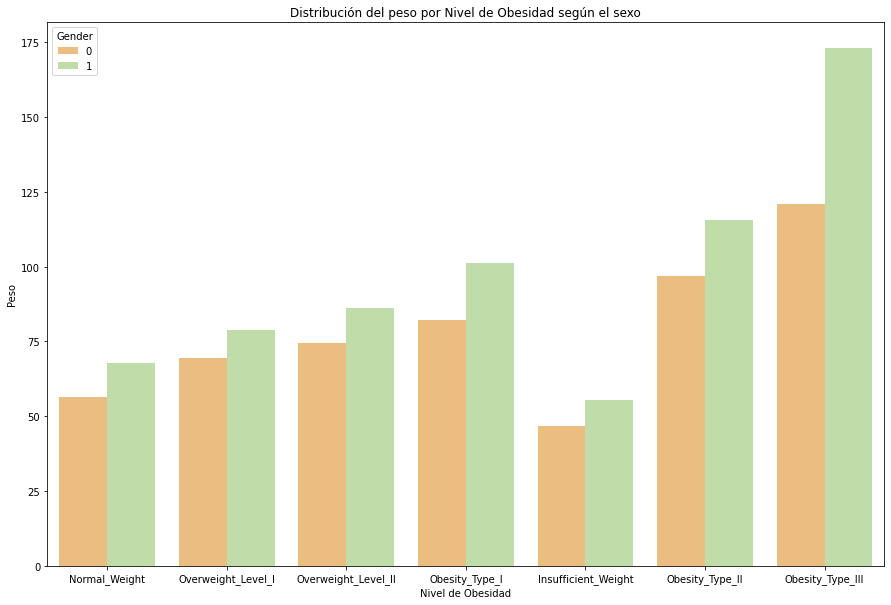

In [22]:
plt.figure(figsize = (15,10))
sns.barplot(data = df, x = "Nobesity", y = "Weight", 
            hue = "Gender", palette = "Spectral", ci = None)
plt.title("Distribución del peso por Nivel de Obesidad según el sexo")
plt.xlabel("Nivel de Obesidad")
plt.ylabel("Peso")
plt.show()

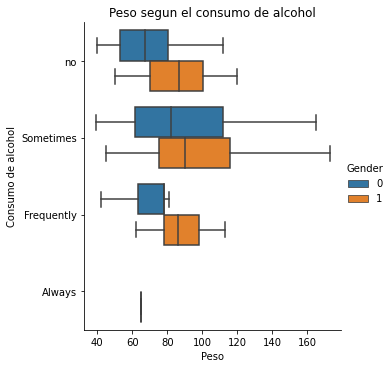

In [23]:
ax = sns.catplot(x = "Weight", y = "CALC", kind = 'box', hue = 'Gender', data = df)
ax.set(xlabel = 'Peso', ylabel = 'Consumo de alcohol', title = 'Peso segun el consumo de alcohol')

Se puede observar que en cualquiera de los Tipos de Consumo de Alcohol, los hombres son quienen tienen pesos mayores por encima de las mujeres.

Hay una enorme diferencia de pesos entre quienes aveces consumen Alcohol y quienes lo hacen frecuentemente, las personas que constantemente beben alcohol tienen pesos mucho menores que aquello que no lo tienen como prioridad, esto podría ser un poco ilogico, dado que el consumo de alcohol te aporta grandes cantidades de calorias. 

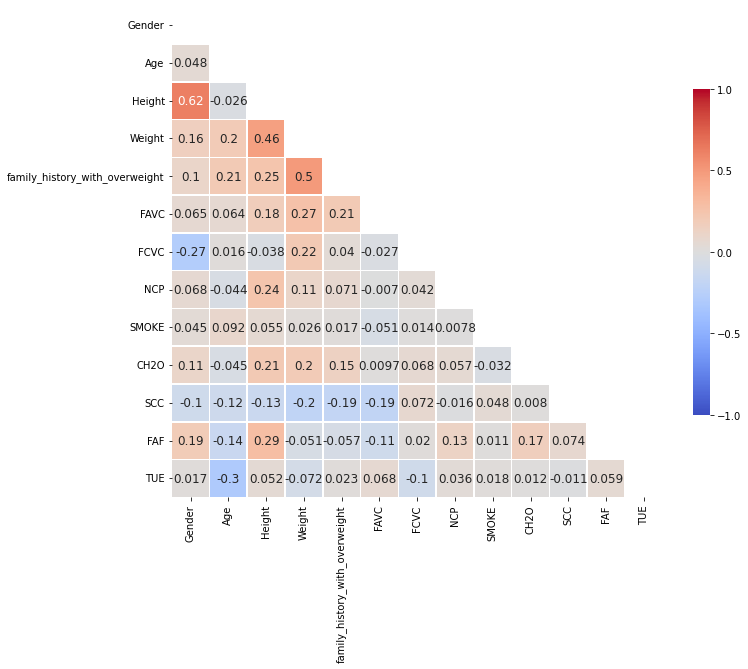

In [24]:
corr_matrix = df.corr()

mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(11, 15))

heatmap = sns.heatmap(corr_matrix,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})

#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

De la matriz de correlación podemos observar que las correlaciones que tenemos de mayor impacto (mayor a 0.4) son:
* Weight vs Height
* Weight vs family_history_with_overweight 
por lo que tomaremos como variable objetivo la variable weight y realizaremos la regresión lineal con las variables height y family:history_with_overweight

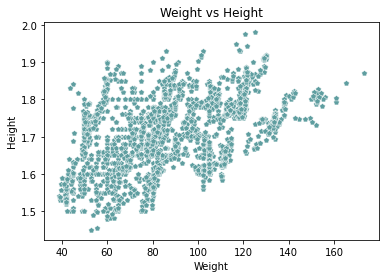

In [25]:

sns.scatterplot(data = df, x = "Weight", y = "Height", color = 'cadetblue', marker='p')
plt.title("Weight vs Height")
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

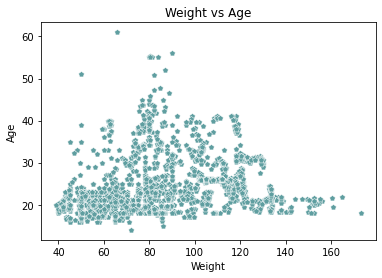

In [26]:

sns.scatterplot(data = df, x = "Weight", y = "Age", color = 'cadetblue',marker='p')
plt.title("Weight vs Age")
plt.xlabel("Weight")
plt.ylabel("Age")
plt.show()

# **Regresión lineal**

In [27]:
#Con OLS

In [28]:
df.head(5)#Traemps los primeros 5 valores

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Nobesity
0,0,21.0,1.62,64.0,1,0,2.0,3.0,Sometimes,0,2.0,0,0.0,1.0,no,Public_Transportation,Normal_Weight
1,0,21.0,1.52,56.0,1,0,3.0,3.0,Sometimes,1,3.0,1,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,1,23.0,1.80,77.0,1,0,2.0,3.0,Sometimes,0,2.0,0,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,1,27.0,1.80,87.0,0,0,3.0,3.0,Sometimes,0,2.0,0,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,1,22.0,1.78,89.8,0,0,2.0,1.0,Sometimes,0,2.0,0,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [29]:
modols= smf.ols(formula='Weight ~ family_history_with_overweight',data=df).fit()
modols.params

Intercept                         59.041141
family_history_with_overweight    33.689061
dtype: float64

In [30]:
print(modols.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     691.2
Date:                Mon, 30 May 2022   Prob (F-statistic):          5.33e-132
Time:                        13:49:38   Log-Likelihood:                -9589.0
No. Observations:                2111   AIC:                         1.918e+04
Df Residuals:                    2109   BIC:                         1.919e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [31]:
#Vector de betas Python

modols= smf.ols(formula='Weight ~ Height + family_history_with_overweight',data=df).fit()
modols.params

Intercept                        -109.047444
Height                            101.701931
family_history_with_overweight     27.603991
dtype: float64

El intercepto no tiene una interpretación correcta, solo nos está anclando la recta en el lugar correcto pues la altura nunca va a ser cero. 
Dado que Height es una variable continua β1 nos dice que al aumentar/disminuir Height en una unidad (en este caso metros) puedes esperar que Weight aumente 101.701931 kg



In [32]:
print(modols.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     619.1
Date:                Mon, 30 May 2022   Prob (F-statistic):          2.97e-212
Time:                        13:49:38   Log-Likelihood:                -9400.4
No. Observations:                2111   AIC:                         1.881e+04
Df Residuals:                    2108   BIC:                         1.882e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

Podemos observar que tanto la altura (height) como el historial familiar (family_history_with_overweight) son significativas para el modelo pues los valores P son casí cero.
El R-squared nos dice que nuestro modelo explica el 37% de la varianza de los datos observados, pero esto no quiere decir que nuestro modelo sea malo, para eso se necesitan analizar los residuos que se hará más adelante.

In [33]:
#Matriz X donde solo tenemos las variables de height y family_history_with_overweight
X=df.iloc[:,[2,4]]

Comprobamos que estemos obteniendo lo deseado

In [34]:
X.head(5)

,Height,family_history_with_overweight
0,1.62,1
1,1.52,1
2,1.80,1
3,1.80,0
4,1.78,0


In [35]:
#Le agregamos el intercepto
X.insert(0, 'intercept', 1)
X

,intercept,Height,family_history_with_overweight
0,1,1.620000,1
1,1,1.520000,1
2,1,1.800000,1
3,1,1.800000,0
4,1,1.780000,0
...,...,...,...
2106,1,1.710730,1
2107,1,1.748584,1
2108,1,1.752206,1
2109,1,1.739450,1


In [36]:
#Calculamos la inversa de XtX
XtXi = np.linalg.inv(X.T @ X)
XtXi

array([[ 0.16102196, -0.09585472,  0.00313782],
       [-0.09585472,  0.05799686, -0.00347009],
       [ 0.00313782, -0.00347009,  0.0033844 ]])

Observamos que es una matriz simétrica

In [37]:
#Calculamos el vector de Betas 
(XtXi@ X.T)@df.Weight

0   -109.047444
1    101.701931
2     27.603991
dtype: float64

In [38]:
#el vector de Betas obtenido anteriormente u otra forma de corroborar nuestros resultados es lo siguiente:

In [39]:
#Vector de betas Python

modols= smf.ols(formula='Weight ~ Height + family_history_with_overweight',data=df).fit()
modols.params

Intercept                        -109.047444
Height                            101.701931
family_history_with_overweight     27.603991
dtype: float64

In [40]:
XtXi@X.T

,0,1,2,3,4,5,6,7,8,9,...,2101,2102,2103,2104,2105,2106,2107,2108,2109,2110
0,0.008875,0.018461,-0.008379,-0.011517,-0.009599,0.005737,0.020378,0.003820,-0.006462,-0.000710,...,0.008063,0.008124,-0.001119,-0.001897,-0.001374,0.000178,-0.003450,-0.003797,-0.002575,-0.002516
1,-0.005370,-0.011170,0.005070,0.008540,0.007380,-0.001900,-0.012330,-0.000740,0.003910,0.000430,...,-0.004879,-0.004915,0.000677,0.001148,0.000831,-0.000108,0.002088,0.002298,0.001558,0.001522
2,0.000901,0.001248,0.000276,-0.003108,-0.003039,-0.002484,0.001317,-0.002553,0.000345,0.000554,...,0.000871,0.000873,0.000539,0.000511,0.000530,0.000586,0.000454,0.000442,0.000486,0.000488


In [41]:
#Otra forma de obtener el vector de Betas es resolviendo un sistema de escuaciones con ayuda de python
np.linalg.solve(X.T @ X, X.T @ df.Weight)

array([-109.04744413,  101.70193093,   27.60399078])

In [42]:
#El error cuadrático medio
np.sqrt(modols.mse_resid)

20.797715825643337

In [43]:
print(modols.mse_resid)

432.54498356421533


El error cuadrático medio es relativamente grande, aún falta observar si hay datos atípicos que hagan que el error cuadrático sea grande.

In [44]:
## Usando el método de la inversa de Moore-Penrose para matrices de rango completo

Xmp = np.linalg.pinv(X)
Xmp.shape

(3, 2111)

In [45]:
##Calculamos el vector Beta con ésta inversa
Xmp@df.Weight

array([-109.04744413,  101.70193093,   27.60399078])

# **Supuestos de la Regresión Lineal**

In [46]:
X=df


In [47]:
X.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Nobesity
0,0,21.0,1.62,64.0,1,0,2.0,3.0,Sometimes,0,2.0,0,0.0,1.0,no,Public_Transportation,Normal_Weight
1,0,21.0,1.52,56.0,1,0,3.0,3.0,Sometimes,1,3.0,1,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,1,23.0,1.80,77.0,1,0,2.0,3.0,Sometimes,0,2.0,0,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,1,27.0,1.80,87.0,0,0,3.0,3.0,Sometimes,0,2.0,0,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,1,22.0,1.78,89.8,0,0,2.0,1.0,Sometimes,0,2.0,0,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [48]:
X.drop('CAEC',axis=1,inplace=True)

In [49]:
X.drop(['CALC','MTRANS','Nobesity'], axis= 1, inplace=True)

In [50]:
X

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,FAF,TUE
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,0,2.000000,0,0.000000,1.000000
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,1,3.000000,1,3.000000,0.000000
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,0,2.000000,0,2.000000,1.000000
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,0,2.000000,0,2.000000,0.000000
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,0,2.000000,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,0,1.728139,0,1.676269,0.906247
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,0,2.005130,0,1.341390,0.599270
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,0,2.054193,0,1.414209,0.646288
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,0,2.852339,0,1.139107,0.586035


In [51]:
y = pd.Series(df.Weight)

In [52]:
X.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,FAF,TUE
0,0,21.0,1.62,64.0,1,0,2.0,3.0,0,2.0,0,0.0,1.0
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,3.0,1,3.0,0.0
2,1,23.0,1.80,77.0,1,0,2.0,3.0,0,2.0,0,2.0,1.0
3,1,27.0,1.80,87.0,0,0,3.0,3.0,0,2.0,0,2.0,0.0
4,1,22.0,1.78,89.8,0,0,2.0,1.0,0,2.0,0,0.0,0.0


In [53]:


lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(f'Coeficientes: {lin_reg.coef_}')
print("----------------------------------")
print(f'Intercepto: {lin_reg.intercept_}')
print("----------------------------------")
print(f'R^2 score: {lin_reg.score(X, y)}')

Coeficientes: [ 1.81475851e-14  8.88178420e-16 -2.69362657e-13  1.00000000e+00
  3.49893725e-15  5.18422111e-15 -1.02001740e-15 -3.64291930e-17
  1.10436833e-15  2.44596010e-16  2.23258911e-15 -3.46944695e-16
  4.24139890e-16]
----------------------------------
Intercepto: 3.126388037344441e-13
----------------------------------
R^2 score: 1.0


Nuestro ajuste del modelo es un buen ajuste de las variables x con nuestras variables y ya que nuestro R^2 score es de 1 osea el 100%

In [54]:
X_constant = sm.add_constant(X)  #Le agregamos el uno 
lin_reg = sm.OLS(y,X_constant).fit()
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.877e+30
Date:                Mon, 30 May 2022   Prob (F-statistic):               0.00
Time:                        13:49:39   Log-Likelihood:                 59527.
No. Observations:                2111   AIC:                        -1.190e+05
Df Residuals:                    2097   BIC:                        -1.189e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

**Supuesto de linealidad**

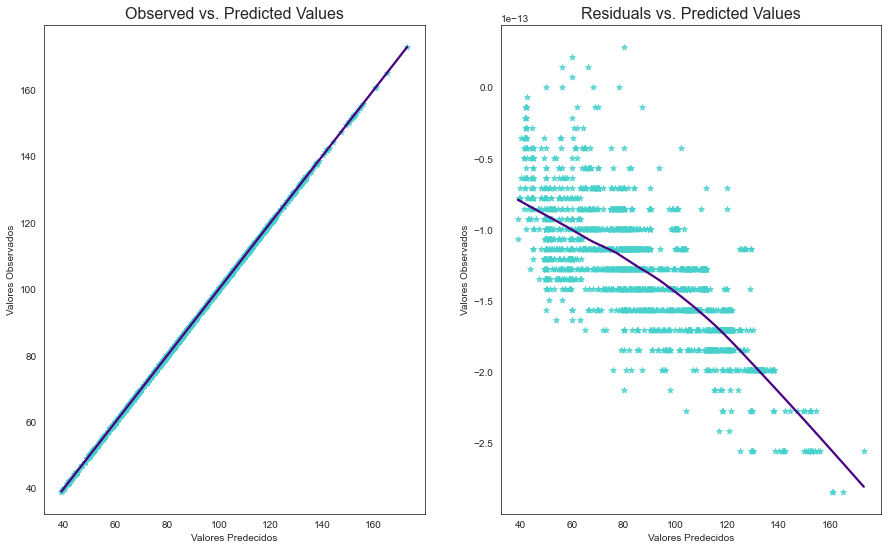

In [55]:
sns.set_style('white')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

## Desarrollamos una función que va a tener como salidas dos gráficas
def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'indigo'}, color = 'mediumturquoise', marker='*')
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Valores Predecidos', ylabel='Valores Observados')

    sns.regplot(x=fitted_vals, y=resids, lowess = True, line_kws={'color': 'indigo'},color = 'mediumturquoise',marker='*')
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Valores Predecidos', ylabel='Valores Observados')
    
linearity_test(lin_reg, y) 

In [56]:
lin_reg.predict()

array([ 64.      ,  56.      ,  77.      , ..., 133.689352, 133.346641,
       133.472641])

Dentro de nuestro set en la primera Gráfica podemos observar que si existe la linealidad pero nuestra segunda gráfica no se observa mucho la linealidad debido a que la mayor parte de nuestras variables no son significativas

**Supuesto de Multicolinealidad**

In [57]:
#Calculamos multicolinealidad usando Vif (Variance Inflation factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor  #Inportamos libreria de interes 

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,FAF,TUE
vif,1.876211,1.233937,2.502468,1.928347,1.39531,1.149237,1.214601,1.085006,1.025466,1.101153,1.100305,1.216996,1.13411


Como podemos observar, la correlación no es alta dentro de nuestras variables dado que son menores a 5 y no llegan a ser de correlacion mediana, podemos decir que nuestro dataset cumple con el supuesto de multicolinealidad

**Supuesto de Homoscedasticidad**


 Test de Breusch-Pagan ----
                                     value
Lagrange multiplier statistic  1868.335241
p-value                           0.000000
f-value                        1241.947317
f p-value                         0.000000

 Test Goldfeld-Quandt ----
                value
F statistic  0.951517
p-value      0.788736

 Gráficos ----


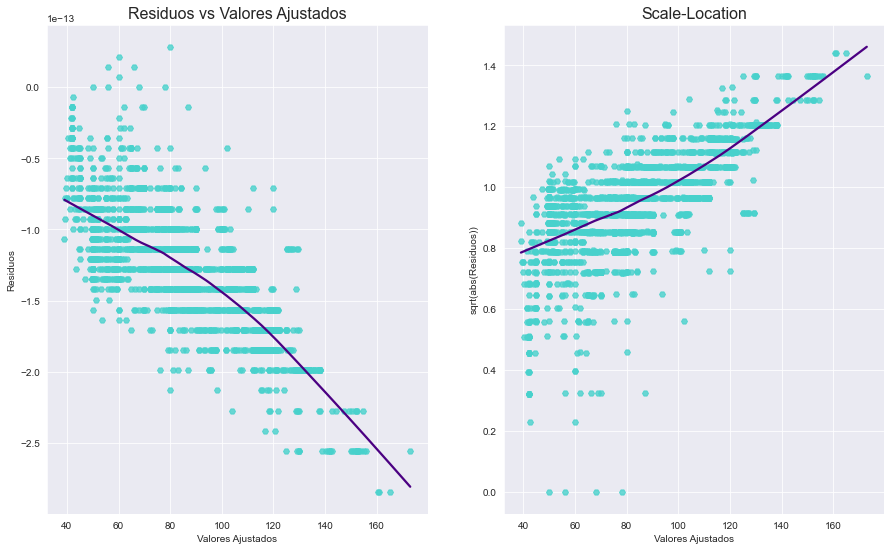

In [58]:
#Comprobamos nuestra Homocedasticidad generando una función

sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def homoscedasticity_test(model):
    '''
    Function for testing the homoscedasticity of residuals in a linear regression model.
    It plots residuals and standardized residuals vs. fitted values and runs Breusch-Pagan and Goldfeld-Quandt tests.
    
    Args:
    * model - fitted OLS model from statsmodels
    '''
    fitted_vals = model.predict()
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'indigo'}, color = 'mediumturquoise', marker='H')
    ax[0].set_title('Residuos vs Valores Ajustados', fontsize=16)
    ax[0].set(xlabel='Valores Ajustados', ylabel='Residuos')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'indigo'}, color = 'mediumturquoise', marker='H')
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Valores Ajustados', ylabel='sqrt(abs(Residuos))')

    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Test de Breusch-Pagan ----')
    print(bp_test)
    print('\n Test Goldfeld-Quandt ----')
    print(gq_test)
    print('\n Gráficos ----')

homoscedasticity_test(lin_reg)

### Observen que con los P-values no podemo decir que la homocedasticidad en este caso este cumplida
### Inclusive vean como las gráficas no muestran un patrón definido en la varianza

Podemos notar que nuestro p-value es de 0 al igual que el f p-value pero dentro de nuestros gráficos podemos notar que no cumple con la linealidad asi que no cumple con nuestro supuesto de Homoscedasticidad

**Supuesto de Autocorrelación**

<ipython-input-59-fa8022676006>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  acf.show()


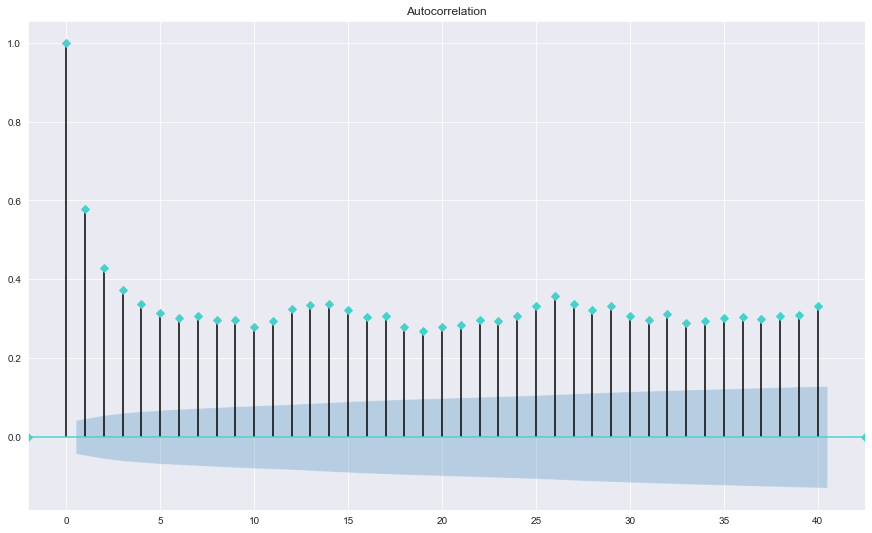

In [59]:
#Realizamos nuestro test para verificar la autocorrelacion 
acf = smt.graphics.plot_acf(lin_reg.resid, lags=40 , alpha=0.05, marker="D", color='mediumturquoise')
acf.show()

Podemos notar claramente que no cumple el supuesto de autocorrelación dado que el test nos arroja no solo que esta equivocado si no que nuestro set de datos no es el idoneo para el test

In [60]:
#Generamos la relacion entre los Features y residuos
for column in X.columns:
    corr_test = pearsonr(X[column], lin_reg.resid)
    print(f'Variable: {column} --- correlation: {corr_test[0]:.4f}, p-value: {corr_test[1]:.4f}')

Variable: Gender --- correlation: -0.1826, p-value: 0.0000
Variable: Age --- correlation: -0.0259, p-value: 0.2339
Variable: Height --- correlation: -0.6565, p-value: 0.0000
Variable: Weight --- correlation: -0.7756, p-value: 0.0000
Variable: family_history_with_overweight --- correlation: -0.4148, p-value: 0.0000
Variable: FAVC --- correlation: -0.0908, p-value: 0.0000
Variable: FCVC --- correlation: 0.0176, p-value: 0.4194
Variable: NCP --- correlation: -0.3048, p-value: 0.0000
Variable: SMOKE --- correlation: 0.2233, p-value: 0.0000
Variable: CH2O --- correlation: -0.2511, p-value: 0.0000
Variable: SCC --- correlation: 0.2942, p-value: 0.0000
Variable: FAF --- correlation: -0.1622, p-value: 0.0000
Variable: TUE --- correlation: -0.1369, p-value: 0.0000


Con esto nos reafirma que la correlacion entre cada variable no es muy alta 

**Supuesto de Normalidad Multivariable**

Jarque-Bera test ---- statistic: 27.3575, p-value: 1.1465678563249426e-06
Shapiro-Wilk test ---- statistic: 0.9869, p-value: 0.0000
Kolmogorov-Smirnov test ---- statistic: 0.5000, p-value: 0.0000
Anderson-Darling test ---- statistic: 10.3355, 5% critical value: 0.7860
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


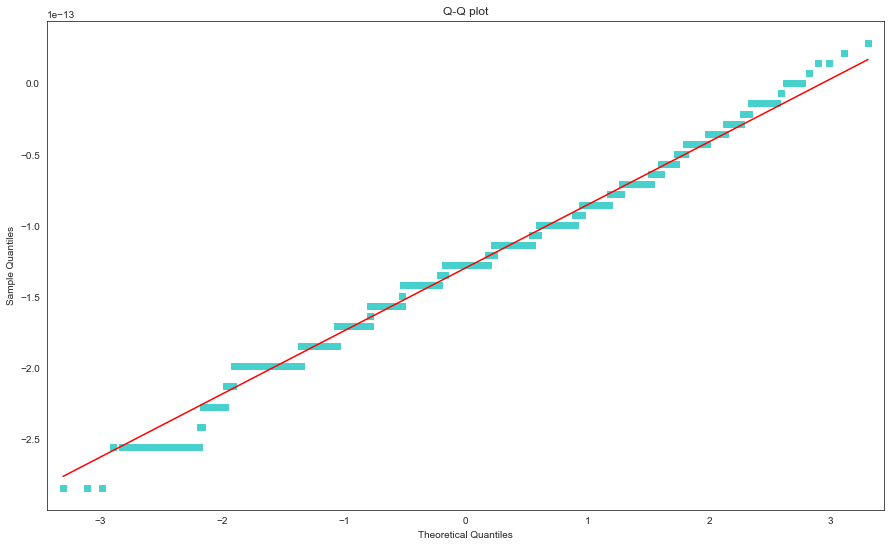

In [61]:
sns.set_style('white')
#Generamos nuestra función para probar la normalidad en los errores

def normality_of_residuals_test(model):
    '''
    Function for drawing the normal QQ-plot of the residuals and running 4 statistical tests to 
    investigate the normality of residuals.
    
    Arg:
    * model - fitted OLS models from statsmodels
    '''
    sm.ProbPlot(model.resid).qqplot(line='s',color = 'mediumturquoise', marker='s');
    plt.title('Q-Q plot');

    jb = stats.jarque_bera(model.resid)
    sw = stats.shapiro(model.resid)
    ad = stats.anderson(model.resid, dist='norm')
    ks = stats.kstest(model.resid, 'norm')
    
    print(f'Jarque-Bera test ---- statistic: {jb[0]:.4f}, p-value: {jb[1]}')
    print(f'Shapiro-Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
    print(f'Kolmogorov-Smirnov test ---- statistic: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}')
    print(f'Anderson-Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
    print('If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. ')
    
normality_of_residuals_test(lin_reg)

Dado que nuestros p-values son cero y además de notar nuestro gráfico podemos ver que no cumple con ser una normal como esperariamos asi que tampoco cumple con nuestro supuesto de Normalidad Multivariable 

**Conclusiones**

Nuestro dataset cumple con 2 supuestos que son los de linealidad y multicolinealidad, mientras que en los 3 restantes (autocorrelación, homoscedasticidad y Normalidad Multivariable) no se cumplen, siendo estos ultimos los supuestos mas fuertes e importantes.

# **Hipótesis**

Dentro del tratamiento del dataset podemos notar que no es el idoneo dado que nuestros supuestos de regresion en la gran mayoria no se cumplen.

Una alternativa es cambiar nuestra variable objetivo para ver si con eso soluciona el hecho de nuestros supuestos o en el peor de los casos, cambiar de dataset. 